# Introduction

One of the key challenges in systems biology is to characterize the energetic state of the cell. However, unlike transcriptomics and proteomics data sets, almost all metabolomics data sets are sparse. Part of the reason for this sparsity is that the chemical properties of small molecules vary widely, so no single instrument can measure every type of metabolite.  Sparsity is also due to the fact that biologically relevant metabolite  concentrations may span several orders of magnitude, which is greater than what typical instrument sensitivities can handle. Therefore, new computational and theoretical methods are needed that can interpolate unmeasured or unmeasurable metabolite levels within a metabolic network using the least biased assumptions that are consistent with our current knowledge.
Constraint-based methods such as flux balance analysis (FBA) have been successfully used to predict the steady-state metabolic fluxes at genome-scale, but net flux predictions by themselves provide no information about the metabolite concentrations. Conversely, kinetic models can be used to predict steady-state metabolite concentrations, but cannot generally be applied at the genome scale due to the challenges involved in measuring rate constants in a high-throughput manner. Thermodynamic-based methods have been used to constrain the reaction direction of metabolic fluxes or to remove thermodynamically infeasible cycles. More recently, an optimization method has been developed that can predict metabolite concentrations by hypothesizing that a metabolic tug of war [@tepper:2013] exists between osmotic pressure to keep metabolite concentrations low, and the need to maintain thermodynamic non-equlibrium in order utilize enzymes efficiently.
An alternative approach for modeling metabolism is to predict energetic states using non-equilibrium thermodynamics. In this approach, we showed that the likelihood ratio of the forward and backward reaction rates are proportional to the thermodynamic driving force [@Cannon:2014]. In a recent study of the coupled reaction theorem, we demonstrated that both thermodynamic and kinetic optimal states are obtained at the maximum rate of entropy production [@Cannon:2017].

Building on this body of work, we present Maximum ENtropy production rate Of the Stoichiometric matrix (MENTOS): a statistical thermodynamic optimization method for predicting the metabolite concentrations and fluxes that extract energy from the environment as quickly and efficiently as possible, given the constraints of the network.  MENTOS was developed to address two major goals. First, the ability to predict reasonable values for steady state metabolite concentrations can be used as a foundation for developing thermokinetic models that can predict non-steady-state dynamics in the absence of rate constants. Second, MENTOS provides a quantitative measure by which we can test the hypothesis that natural systems have evolved to move to the most probable state through the fastest path by minimizing energetic costs.  In the theory section below, we develop the basic concepts of statistical thermodynamic that are necessary to formalize this hypothesis, and demonstrate the application of this hypothesis to a simple toy model. We will then apply the hypothesis to the central carbon metabolism of E. coli and compare the metabolite predictions with actual measurements.



# Theory/Methods

In this section, we will introduce the basic concepts of
statistical thermodynamics that are required for the formulation of the
MENTOS approach

## Derivation of mass action rate constants   from the steady state net flux and concentrations

Consider a simple bimolecular reversible reaction in
which $\gamma_A$  moles of $A$ and moles
of $B$ are transformed into $\gamma_C$ moles of $C$
and $\gamma_D$ moles of $D$. This reaction
proceeds at forward reaction rate $r_+$ and reverse
reaction rate $r_-$:

$$
\begin{equation}\label{eqn:simple_reaction_scheme}
\gamma_A A + \gamma_B B \overset{\overset{r_+}{\rightharpoonup}}{\underset{r_-}{\leftharpoondown}} \gamma_C C + \gamma_D D
\end{equation}
$$

According to the law of mass action, both the forward and reverse rates
are dependent on the concentration of their corresponding reactant
species:

$$
\begin{eqnarray}\label{eqn:mass-action}
r_+  & =  k_+[A]^{\gamma_A}[B]^{\gamma_B} \\
r_-  & =  k_-[C]^{\gamma_C}[D]^{\gamma_D} \\
\end{eqnarray}
$$

Where $k_+$ and $k_-$ are the rate constants
of the forward and the reverse reaction, respectively. To solve for
the two unknown rate constants, we need two equations. The first
equation comes from the definition of the net rate $\Delta r$:

$$
\begin{eqnarray}
\Delta r & = &r_+-r_- \\
&= &  k_+[A]^{\gamma_A}[B]^{\gamma_B} -  k_-[C]^{\gamma_C}[D]^{\gamma_D}\label{eqn:flux-def} \\
\end{eqnarray}
$$

To find the second equation, we introduce the concept of the
thermodynamic driving force, or reaction affinity $\mathcal A$,
which is defined in terms of the forward and reverse rates:

$$
\begin{equation}\label{eqn:reaction-affinity-ratio}
\frac{\mathcal A}{RT}= \log\frac{r_+}{r_-} 
\end{equation}
$$

Where $R$ is the gas constant, and $T$ is
the temperature.  Combining equations
(\ref{eqn:mass-action}) and
(\ref{eqn:reaction-affinity-ratio}), we have


$$
\begin{eqnarray}\label{eqn:reaction-affinity-mass-action-ratio}
\frac{\mathcal A}{RT} &=& \log\frac{r_+}{r_-} \\
& = & \log\left(\frac{k_+}{k_-}\frac{[A]^{\gamma_A}[B]^{\gamma_B}}{[C]^{\gamma_C}[D]^{\gamma_D}}\right) \\
& = & \log\left(\frac{k_+}{k_-}\right) + \log\left(\frac{[A]^{\gamma_A}[B]^{\gamma_B}}{[C]^{\gamma_C}[D]^{\gamma_D}}\right) \\
& = & \log\left(\frac{k_+}{k_-}\right) - \log\left(\frac{[C]^{\gamma_C}[D]^{\gamma_D}}{[A]^{\gamma_A}[B]^{\gamma_B}}\right) \\
& = & \log\left(\frac{k_+}{k_-}\right) - \log{Q_r} \\
\end{eqnarray}
$$

where the reaction quotient  $\displaystyle Q_r = \frac{[C]^{\gamma_C}[D]^{\gamma_D}}{[A]^{\gamma_A}[B]^{\gamma_B}}$ .  The thermodynamic
driving force for equation
(\ref{eqn:simple_reaction_scheme}) can also be
defined in terms of the molar free energy of the species involved,
usually referred to as a chemical potential ($\mu$):

$$
\begin{equation}\label{eqn:reaction-affinity}
\frac{\mathcal{A}}{RT}=\frac{1}{RT}\left(\gamma_{A}\mu_{A}+\gamma_{B}\mu_{B}-\gamma_{C}\mu_{C}-\gamma_{D}\mu_{D}\right)
\end{equation}
$$

  The chemical potential of each metabolite is defined in terms of the
metabolite concentrations and the standard chemical potentials
($\mu^\circ$)

$$
\begin{eqnarray}\label{eqn:chemical-potential}
\mu_A & = &\mu_A^\circ + RT\log [A] \\
\mu_B & = & \mu_B^\circ + RT\log [B] \\
\mu_C & =& \mu_C^\circ+ RT\log [C] \\
\mu_D & = &\mu_D^\circ + RT\log [D] \\
\end{eqnarray}
$$

Substituting equation (\ref{eqn:chemical-potential})
into equation (\ref{eqn:reaction-affinity}), we have

  
$$
\begin{eqnarray}\label{eqn:reaction-affinity-chemical-potential}
\frac{\mathcal{A}}{RT} & =&\frac{1}{RT}\left(\gamma_{A}\mu_{A}+\gamma_{B}\mu_{B}-\gamma_{C}\mu_{C}-\gamma_{D}\mu_{D}\right) \\
& = &\frac{1}{RT}\left(\gamma_{A}(\mu_A^\circ + RT\log [A])+\gamma_{B}(\mu_B^\circ + RT\log [B])-\gamma_{C}(\mu_C^\circ + RT\log [C])-\gamma_{D}(\mu_D^\circ + RT\log [D])\right) \\
& = & \frac{1}{RT}\left(\gamma_A\mu_A^\circ + \gamma_B\mu_B^\circ -\gamma_C\mu_C^\circ -\gamma_D\mu_D^\circ\right) + \left(\gamma_A\log [A] + \gamma_B\log [B] - \gamma_C\log [C] - \gamma_D\log [D]\right) \\
& = &\log e^{\frac{1}{RT}(\gamma_A\mu_A^\circ + \gamma_B\mu_B^\circ -\gamma_C\mu_C^\circ -\gamma_D\mu_D^\circ)} - \log\left( \frac{[C]^{\gamma_C}[D]^{\gamma_D}}{[A]^{\gamma_A}[B]^{\gamma_B}}\right) \\
& =  & \log K^\circ -\log Q_r \\
\end{eqnarray}
$$

where the standard equilibrium constant $\displaystyle K^\circ = e^{\frac{1}{RT}\left(\gamma_C\mu_C^\circ+ \gamma_D\mu_D^\circ -\gamma_A\mu_A^\circ-\gamma_B\mu_B^\circ\right)}$ and the
reaction quotient  $\displaystyle Q_r = \frac{[C]^{\gamma_C}[D]^{\gamma_D}}{[A]^{\gamma_A}[B]^{\gamma_B}}$. Comparing the last line of
equation
(\ref{eqn:reaction-affinity-mass-action-ratio}) with
the last line of equation
(\ref{eqn:reaction-affinity-chemical-potential}), we
see that the ratio of unknown forward and reverse rate constants is the
standard equilibrium constant, which can be calculated from the standard
chemical potentials using empirical methods such as the group
contribution method and the component contribution
method \cite{Jankowski2008}\cite{Mavrovouniotis1988} \cite{Noor2013}, or from
nonempirical quantum chemistry methods such as density functional
theory, post Hartree-Fock and molecular dynamics \cite{Jinich2014}.

$$
\begin{eqnarray}
\frac{k_+}{k_-}&= &K^\circ \\
& =  & e^{\frac{1}{RT}\left(\gamma_C\mu_C^\circ+ \gamma_D\mu_D^\circ -\gamma_A\mu_A^\circ-\gamma_B\mu_B^\circ\right)}\label{eqn:equilibrium-constant} \\
\end{eqnarray}
$$

Therefore, given the net flux $v_{net}$, the steady-state
concentrations $[A]_{SS},[B]_{SS},[C]_{SS},[D]_{SS}$, the temperature $T$and
the standard chemical potentials $\mu_A^\circ,\mu_B^\circ,\mu_C^\circ,\mu_D^\circ$, we can now solve
for the forward and reverse rate constants $k_+$
and $k_-$ by combining equation
(\ref{eqn:flux-def})  with equation 
(\ref{eqn:equilibrium-constant}),


$$\begin{eqnarray}
v_{net} & =& k_+[A]_{SS}^{\gamma_A}[B]_{SS}^{\gamma_B} - k_-[C]_{SS}^{\gamma_C}[D]_{SS}^{\gamma_D} \\
k_+ &= & k_-e^{\frac{1}{RT}\left(\gamma_C\mu_C^\circ+ \gamma_D\mu_D^\circ -\gamma_A\mu_A^\circ-\gamma_B\mu_B^\circ\right)} \\
\end{eqnarray}$$

## Relationship between net likelihoods and net flux


There is an important relationship between the net
rate $ \Delta r=r_+ - r_-$ and the net thermodynamic force.  Recall the
thermodyamic force in the forward direction is related to the likelihood
ratio of the forward and backward rates $e^{\mathcal A/RT} = r_+/r_- = L_+$, and the
thermodynamic force in the backward direction is related to the
likelihood ratio of the backwards and forward rates $e^{-\mathcal A/RT} = r_-/r_+ = L_-$

Then the net rate $\Delta r$  can be defined in terms of the net
likelihood ratio $\Delta L = L_+ - L_-$


$$\begin{eqnarray}\label{eqn:net-likelihood}
\Delta L & = &L_+ - L_- \\
& = &\frac{r_+}{r_-} - \frac{r_-}{r_+} \\
& =  &\frac{r+}{r_+}\frac{r_+}{r_-} - \frac{r_-}{r_-}\frac{r_-}{r_+} \\
& =  &\frac{r_+^2 - r_-^2}{r_+r_-} \\
& =  &\frac{(r_+ + r_-)(r_+ - r_-)}{r_+r_-} \\
& =  &\frac{r_+ + r_-}{r_+r_-}\Delta r \\
\frac{r_+r_-}{r_+ + r_-}\Delta L &= &\Delta r \\
\mu_r\Delta L &= &\Delta r \\
\end{eqnarray}$$



We call the quantity $\mu_r = \frac{r_+r_-}{r_+ + r_-}$ the reduced rate, which is analogous to the reduced mass when computing relative force in Newtonian or Lagrangian mechanics.  Note that

$$\begin{eqnarray}
\mu_r&  \leq & r_+ \\
\mu_r & \leq &r_- \\
\mu_r &= & \frac{r_+}{2} = \frac{r_-}{2} & \text{  if } r_+ = r_- \\
\mu_r &\approx & r_- & \text{ if } r_+ \gg r_- \\
\mu_r &\approx &r_+  &\text{ if } r_- \gg r_+ \\
\end{eqnarray}$$


## Solving for the metabolite concentrations that maximize entropy production

Here, we formalize the concept of extracting energy from the environment as quickly and efficiently as possible. Assume a metabolic network that can convert an initial substrate (energy source) to biomass. To extract energy from the environment as efficiently as possible, the total free energy change for the macroscopic reaction should be distributed as evenly as possible across each microscopic reaction in the pathway in order to prevent bottlenecks that require an exponential amount of enzyme to generate biomass.


For a pathway, we define the probability that a reaction $i$ will fire in the forward  direction ${\mathcal P_{+i}}$ by normalizing its forward likelihood ratio by the sum of all forward and backward likelihood ratios in the pathway. Similarly, we define the probability that reaction $i$ will fire in the backward direction $\mathcal P_{-i}$ by normalizing its backward likelihood ratio by  the sum of all forward and backward likelihood ratios in the metabolic network


$$
\begin{eqnarray}\
{\mathcal P}_{+i}  & =  \frac{r_{+i}/r_{-i}}{\sum_j^n\left(r_{+j}/r_{-j} + r_{-j}/r_{+j}  \right)} & =  \frac{e^{\mathcal A_i/RT}}{\sum_j^n \left( e^{\mathcal A_j/RT} + e^{-\mathcal A_j/RT}\right)} \\
{\mathcal P}_{-i}  & =  \frac{r_{-i}/r_{+i}}{\sum_j^n\left(r_{+j}/r_{-j} + r_{-j}/r_{+j}  \right)} & =  \frac{e^{-\mathcal A_i/RT}}{\sum_j^n \left(e^{\mathcal A_j/RT} + e^{-\mathcal A_j/RT}\right)} \\
\end{eqnarray}
$$

The entropy of the reaction, or entropy production,~\(\Delta S\),~
is a measure of the evenness of the reaction probability distribution.

$$\begin{equation}
\Delta S = -\sum_j^n\mathcal P_{+j}\log\mathcal P_{+j} -\sum_j^n\mathcal P_{-j}\log\mathcal P_{-j} 
\end{equation}$$

Microscopic entropy production rate is the entropy of each reaction,
weighted by its rate




$$\begin{equation}
\dot S_{micro} = -\sum_j^n\mathcal P_{+j}\log\mathcal P_{+j}r_{+j} -\sum_j^n\mathcal P_{-j}\log\mathcal P_{-j} r_{-j}
\end{equation}$$


Macroscopic entropy production rate is the entropy of each reaction,
weighted by the overall growth rate:



$$\begin{equation}
\dot S_{macro} = -\sum_j^n\mathcal P_{+j}\log\mathcal P_{+j}v_{growth} -\sum_j^n\mathcal P_{-j}\log\mathcal P_{-j} v_{growth}
\end{equation}$$

# Results

## Application of MENTOS to the ABC model}



Now that we have defined entropy production, we can solve for the
metabolite concentrations that maximize entropy production.


$$
\begin{array}{llll}
  &  \text{maximize}  &  - \sum_j\left(\mathcal P_{+j}\log(\mathcal P_{+j}) +  \mathcal P_{-j}\log(\mathcal P_{-j})\right) & \text{Maximize Entropy Production}  \\
   & \text{subject to}  & S\cdot(\vec{\bf L}_+-\vec{\bf L}_-) = 0  &  \text{Steady-state Net Likelihood Constraint} \\
     &                  &\log\vec{\bf L}_+ +\frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} = 0 & \text{Thermodynamic Constraint} \\
                      %% & \log\vec{\bf L}_- = \frac{1}{RT}S^T\cdot\vec{\mu}^0 + S^T\cdot\log\vec{\bf c} \\
                      %% & \log\vec{\bf L}_+  -\log\vec{\bf L}_- \\
                     %% & \vec{v}_{lower}(L_+) \leq \vec{\bf r}_+ -\vec{\bf r}_- \leq \vec{v}_{upper}(L_+) \\
      &                   & \vec{\bf L}_+ \geq 0 & \text{Positive forward likelihood Constraint} \\
       &                  & \vec{\bf L}_- \geq 0 & \text{Positive backward likelihood Constraint} \\
        &              & \log \left[{\bf A}_{ext}\right] = \log \left[{\bf E}_{ext}\right] =  \log c_{upper} & \text{Input boundary Constraint} \\
       &               & \log \left[{\bf E}_{ext}\right] = \log \left[{\bf D}_{ext}\right] = \log c_{lower}  & \text{Output boundary Constraint} \\         
\end{array}$$



Where

* $\vec{\bf L}_+,\vec{\bf L}_-$ are decision variables representing the likelihood
  ratios of the forward and backward rates
* ${\bf L}_{+i} = r_{+i}/r_{-i}$ for each reaction $i$
* ${\bf L}_{-i} = r_{-i}/r_{+i}$ for each reaction $i$.
* $\displaystyle {\mathcal P}_{+i},{\mathcal P}_{-i}$ are the normalized likelihood ratios of the forward
  and backward rates
*  $\displaystyle \mathcal P_{+i} = \frac{L_{+i}}{\sum_j\left(L_{+j} + L_{-j}\right)} = \frac{r_{+i}}{r_{-i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1} = \frac{e^{\mathcal A_i/RT}}{\sum_j\left(e^{\mathcal A_j/RT} +e^{-\mathcal A_j/RT}\right)}$
*  $\displaystyle \mathcal P_{-i} = \frac{L_{-i}}{\sum_j\left(L_{+j} + L_{-j}\right)} = \frac{r_{-i}}{r_{+i}}\left(\sum_j\frac{r_{+j}}{r_{-j}} + \frac{r_{-j}}{r_{+j}}\right)^{-1} = \frac{e^{-\mathcal A_i/RT}}{\sum_j\left(e^{\mathcal A_j/RT} +e^{-\mathcal A_j/RT}\right)}$
*  $\log\vec{\bf c}$ is a decision variable representing the log
  concentrations of each metabolite
*  $S$ is the $m\times n$ stoichiometric matrix
  of representing $m$ metabolites and
  $n$ reactions of the model\\
*  $\vec{\mu}^0$ is the vector of standard chemical potentials

## ABC model

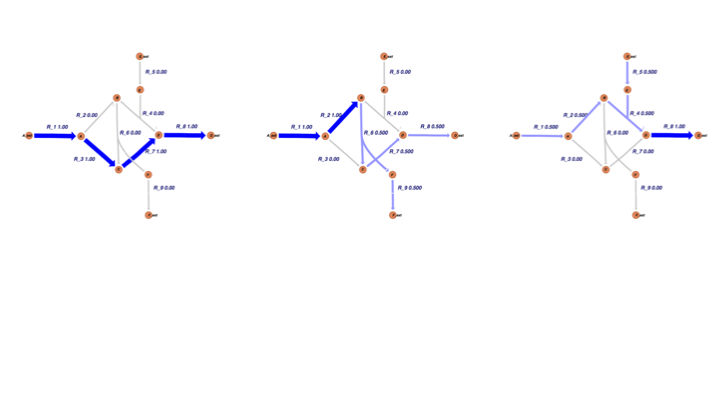

## Material view

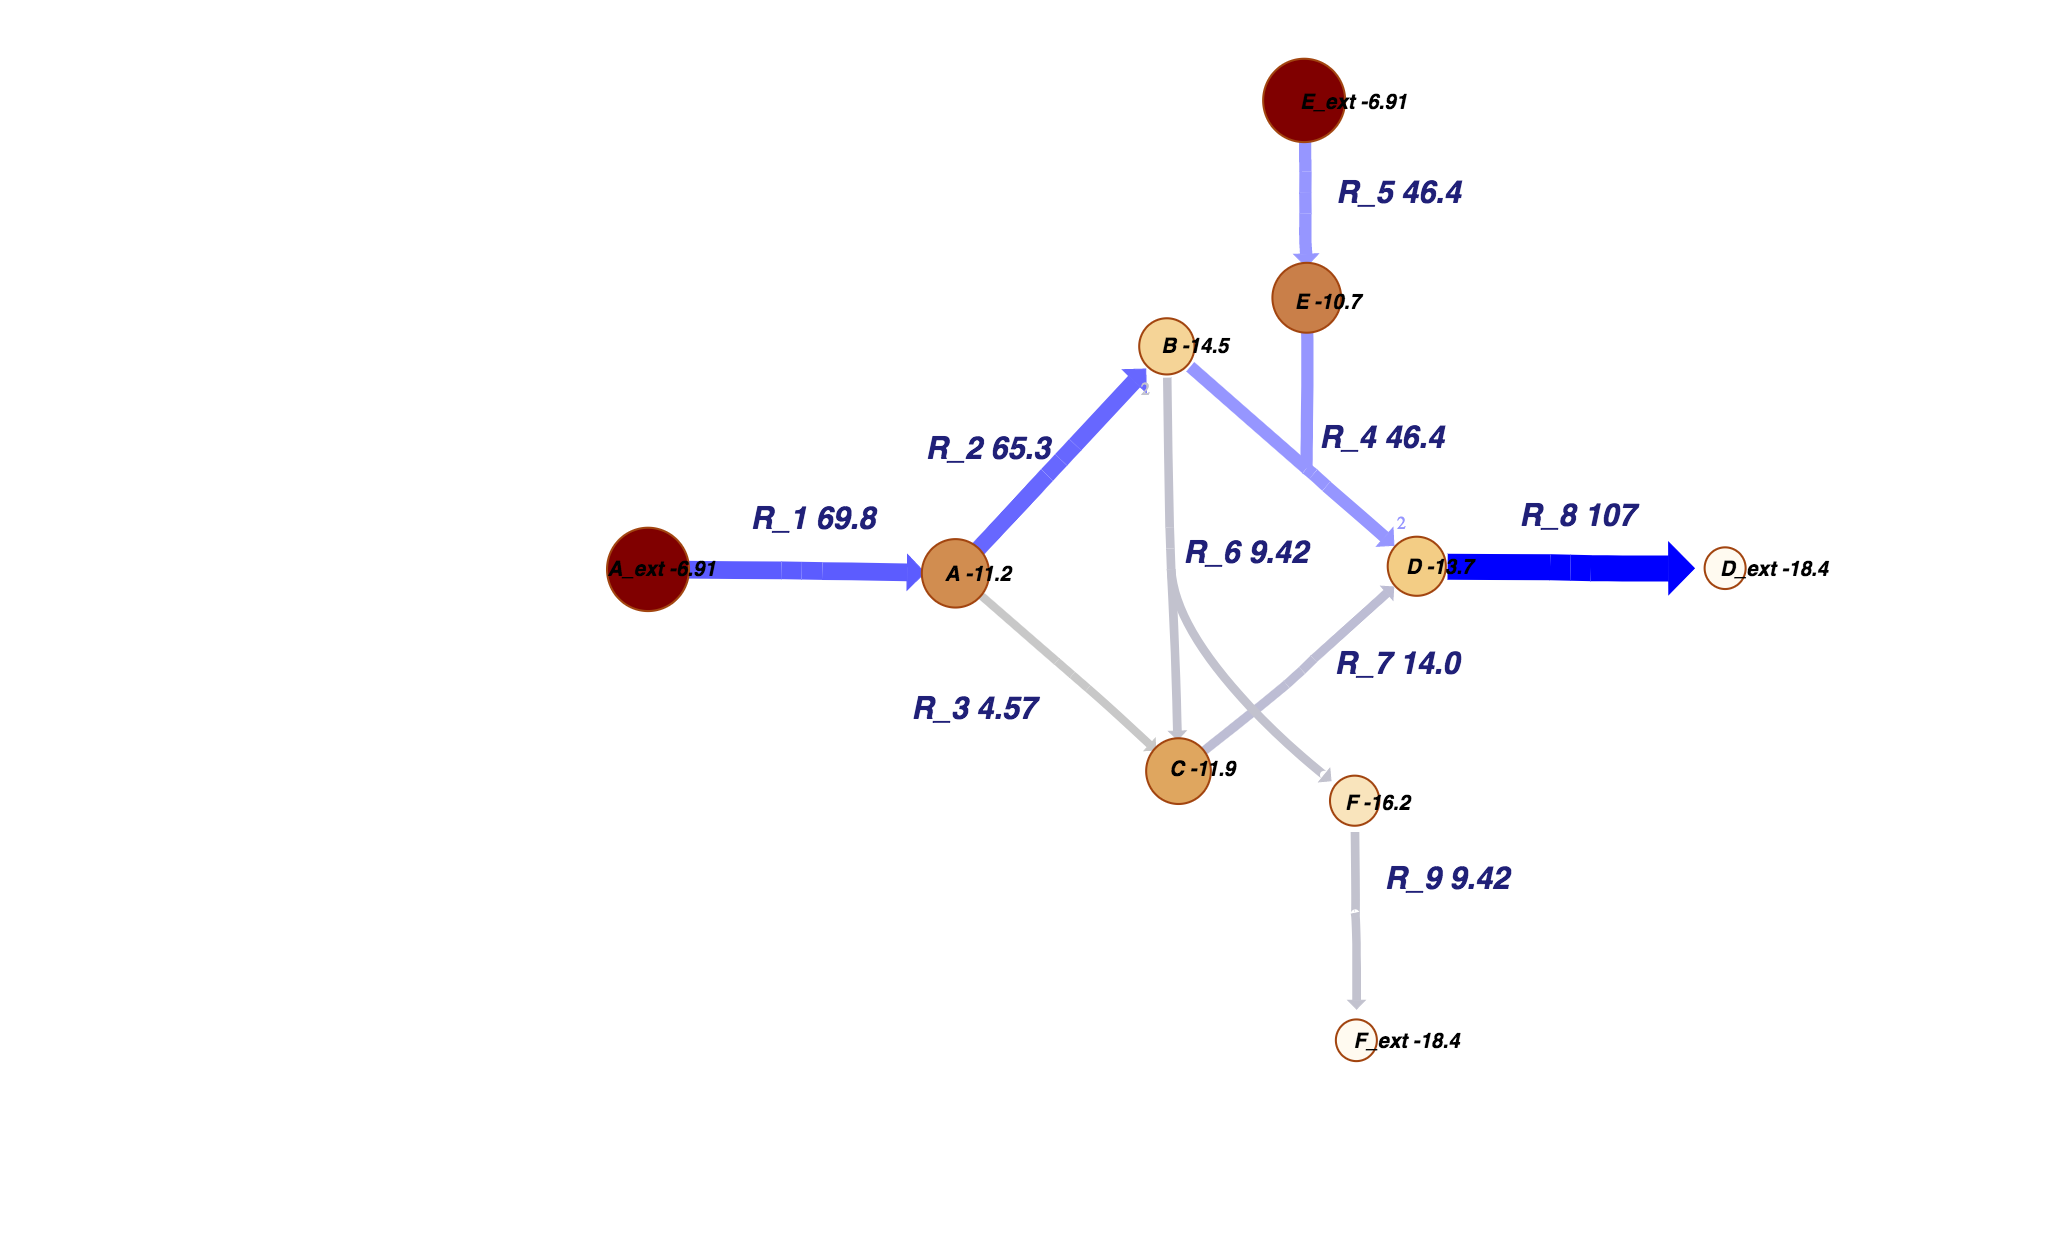
**MENTOS prediction of the net difference between the likelihood ratio of
forward to backward rates and the likelihood ratio of backward to
forward rates (edges) and log concentrations (nodes)**. Net likelihoods
satisfy the steady-state constraint, and are proportional to the fluxes
that are predicted to be associated with these metabolite concentrations


## Energy view

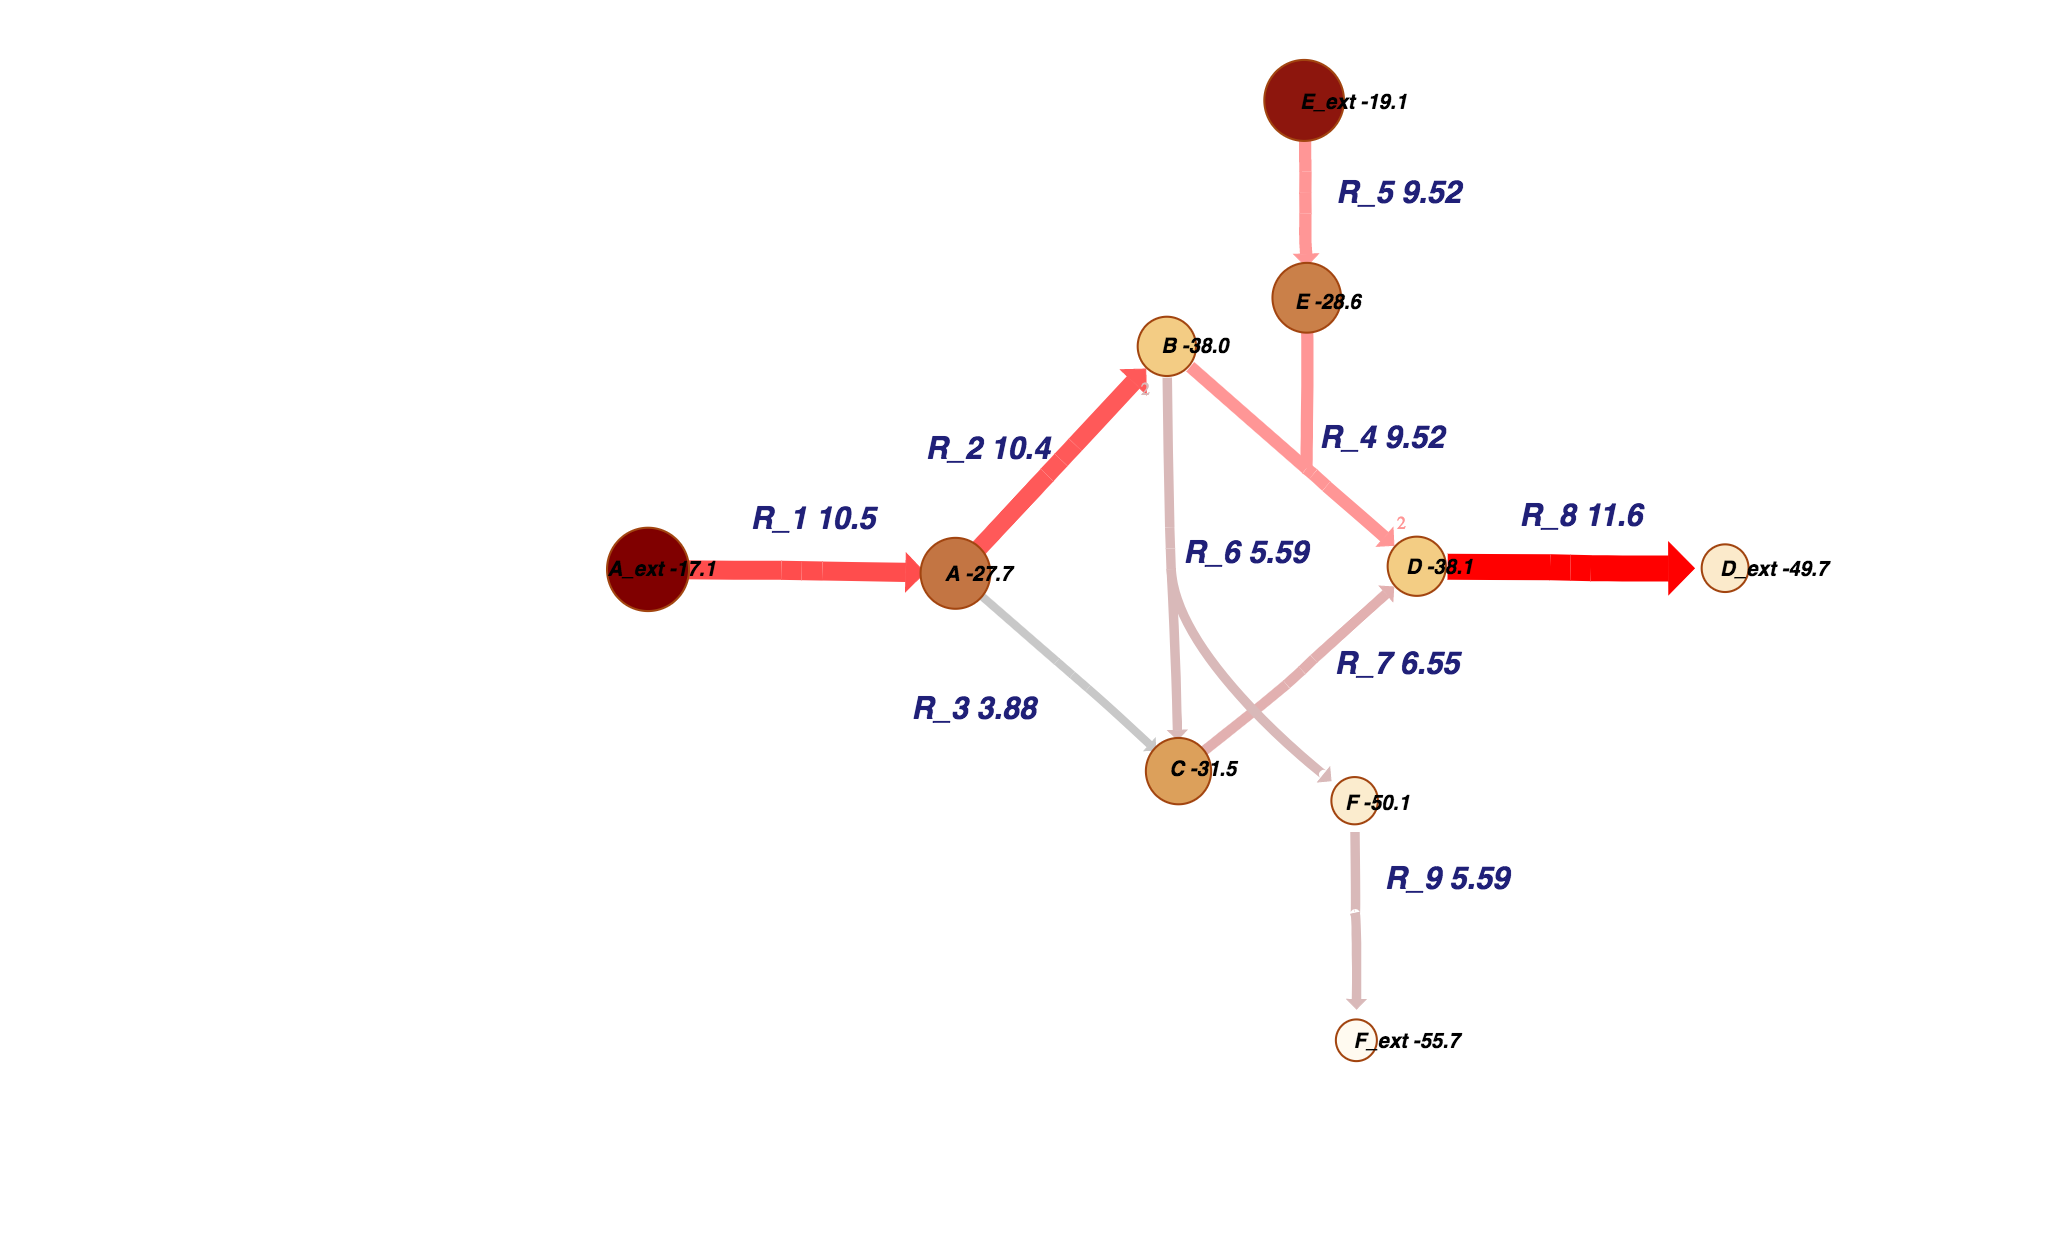
**MENTOS prediction of the thermodynamic force (edges) and chemical
potential (nodes)**. The thermodynamic force is the difference between
reactant and product chemical potentials, weighted by their respective
stoichiometries, and is equal to the negative change in gibbs free
energy of the reaction.

## Entropy production view
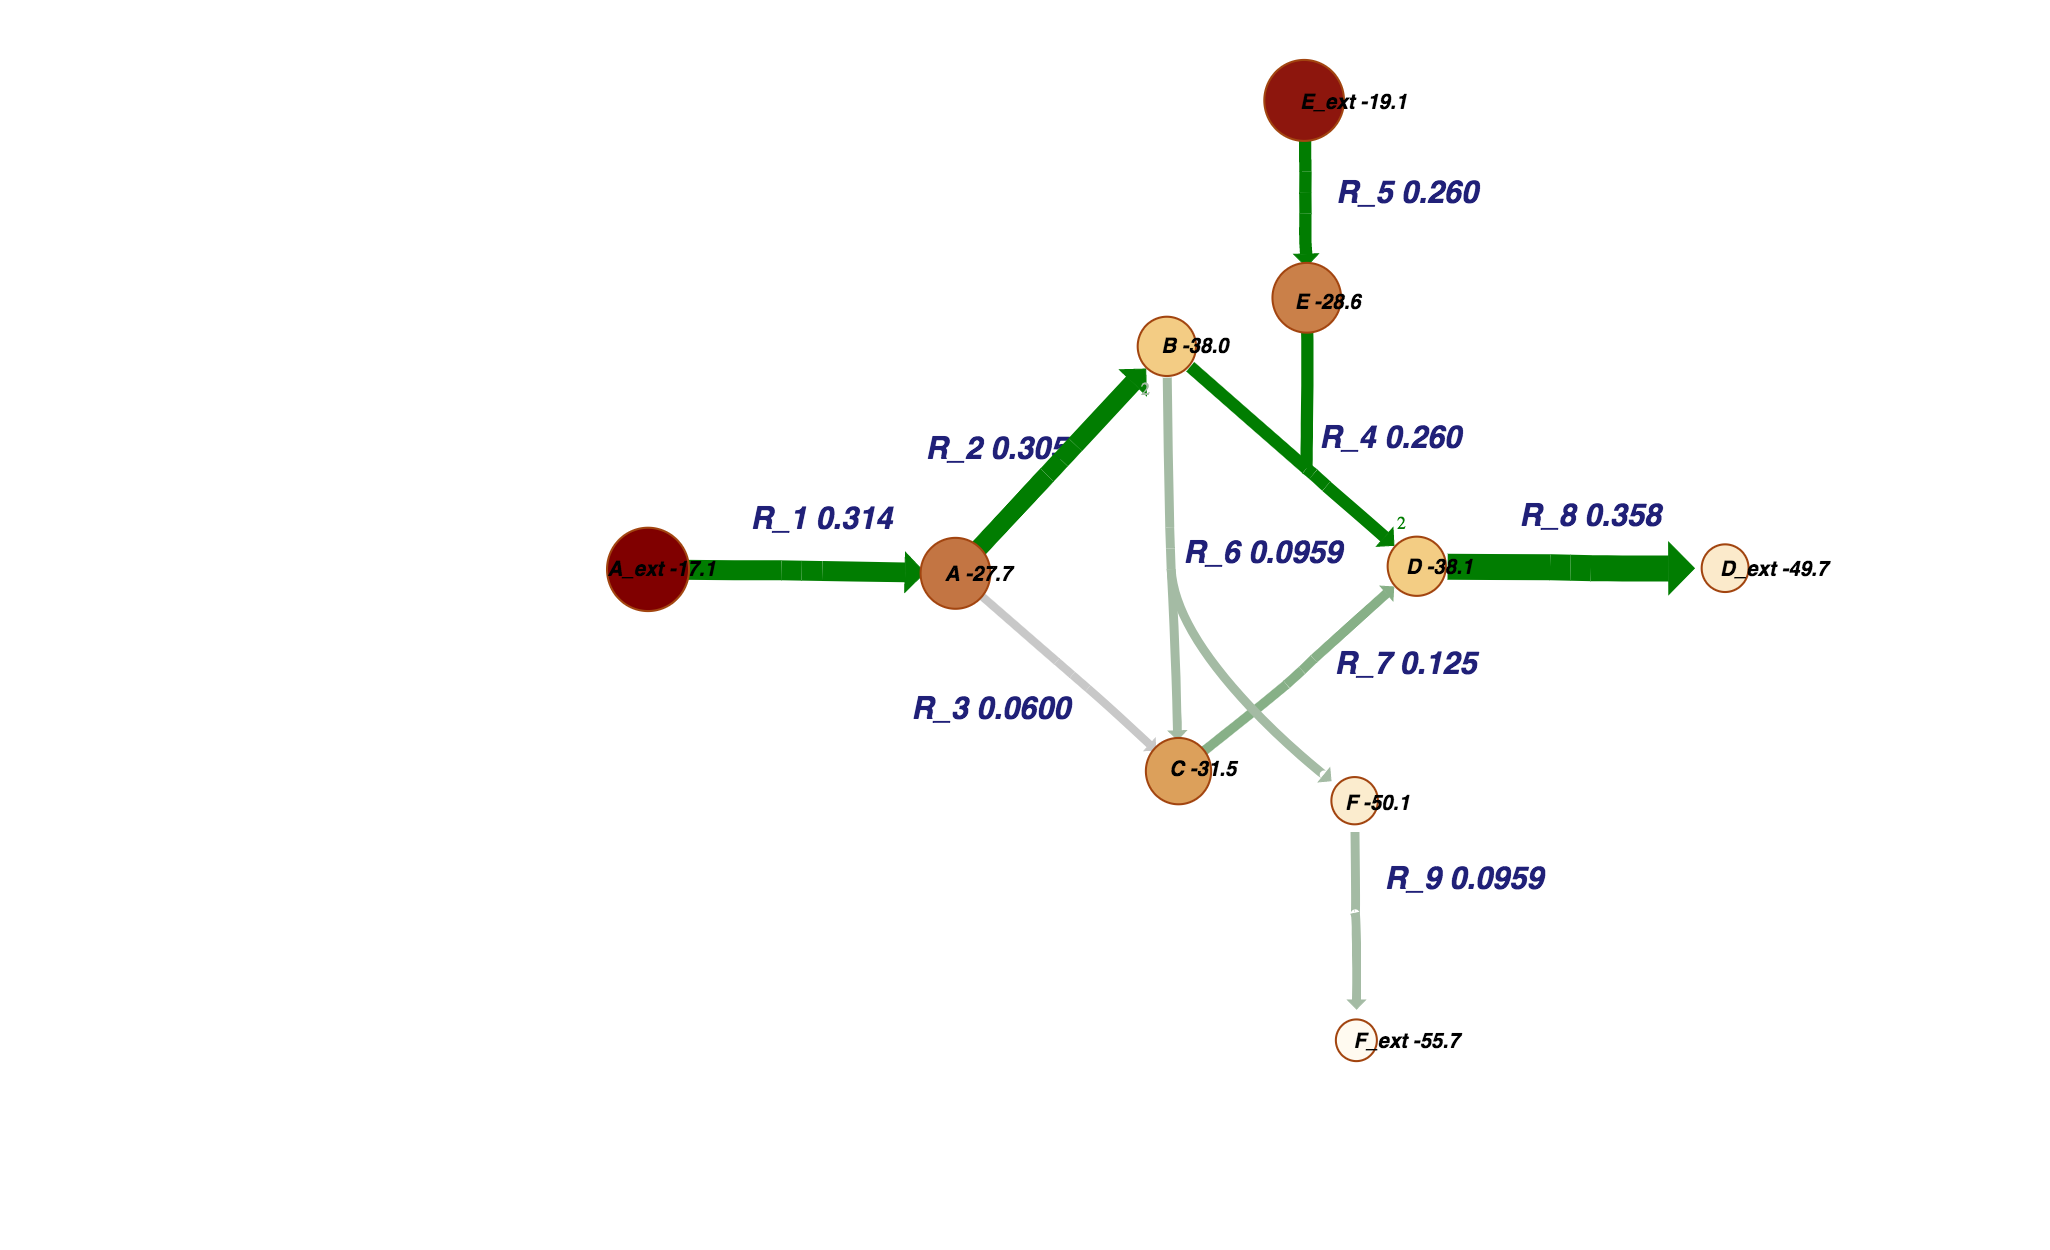
**MENTOS prediction of the reaction entropy (edges) and chemical potential
(nodes)** The reaction entropy is the entropy of the normalized~
likelihood ratios.
